In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
import numpy as np
import cv2 as cv

# Transformations in 2D

- Refer to Chapter 2.4 A hierarchy of transformation in [Hartley's book: Multiple View Geometry in Computer Vision 2nd Edition](https://www.amazon.com/Multiple-View-Geometry-Computer-Vision/dp/0521540518)

- Homogeneous coordinate representation
- Euclidean Transformation: $R$, $t$
    - $H_E = R T$
    $$
        R = \begin{bmatrix}  \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}
        \quad
        T = \begin{bmatrix}  1 & 0 & t_x \\ 0 & 1 & t_x \\ 0 & 0 & 1 \end{bmatrix}
    $$

- Similarity Transformation: $s$, $R$, $t$
    $$
        S_s = \begin{bmatrix}  s & 0 & 0 \\ 0 & s & 0 \\ 0 & 0 & 1 \end{bmatrix}
    $$
- Affine Transformation: $A = \{ s, R, t, h\}$
    $$
        T_A =  R T S_s S_h
    $$

    - $h$: parameter for shear transformation 
    $$
        S_h = \begin{bmatrix}  1 & h & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
    $$
- Projective (Perspective) Transformation:
    $$
        H = R T S_s S_h P
    $$
    where
    $$
        P = \begin{bmatrix}  1 & 0 & 0 \\ 0 & 1 & 0 \\ v_1 & v_2 & 1 \end{bmatrix}
    $$

## Bilinear Interpolation

## Forward Transformation

## Backward Transformation

## Computation of the Transformation Matrix
When point correspondences are given instead of the transformation matrix, we need to find the transformation itself to perform the image mapping and interpolation.

1. One point correspondence determines the translation
2. Two point correspondences may determine: Euclidean, Similarity, or Euclidean+Shearing
3. Three point correspondences determine the affine transformaton
4. Four point correspondences determine the projective transformaiton

### Euclidean Transformation, Step-by-step Computation
- Given two point correspondences, find two canonical transformations that transfrom each of the point sets onto the $x$-axis.
- Apply inverse transformation to find the target transformation

### Affine Transformation and Texture Mapping

#### From a triangle to the canonical triangle:
- The canonical triangle: $\{ (0,0), (1,0), (0,1) \}$
- Given a triangle $\{ p_0, p_1, p_2 \}$
    1. $p_0$ goes to the the origin. This determines $\mathbf{H}_0$, and we transform the other two points.
    2. $p_1$ (which is obtained by $\mathbf{H}_0p_1$) goes to $x$-axis by rotation $\mathbf{H}_1 = \mathbf{R}(\theta)$ where 
        $$
            \theta = -\mathrm{atan2}(p_{1y}, p_{1x})
        $$
    3. $x_1$ goes to $1$ by scaling $s_x = 1/x_1$:
        $$
            \mathbf{H}_2 = \begin{bmatrix}  s_x & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
        $$
    4. Shearing: $(x_2, y_2)$ goes to $(0, y_2)$ by
        $$
            \mathbf{H}_3 = \begin{bmatrix}  1 & 0 & 0 \\ h & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
        $$
        where $h$ is obtained from the equation:
        $$
            x_2 h + y_2 = 0 \quad\Rightarrow\quad h = - \frac{y_2}{x_2}
        $$
    5. Finally, $y_2$ goes to $1$ by scaling:
        $$
            \mathbf{H}_4 = \begin{bmatrix}  1 & 0 & 0 \\ 0 & 1/y_2 & 0 \\ 0 & 0 & 1 \end{bmatrix}
        $$

    * Total Transformation:
        $$
            \mathbf{H} = \mathbf{H}_4 \cdots \mathbf{H}_0
        $$
        
- Compute the two series of transformations for $\{ p_0, p_1, p_2 \}$ and $\{ q_0, q_1, q_2 \}$, then $H: p \Rightarrow q$ is given by:
    $$
        \mathbf{H}_{p\Rightarrow q} = \mathbf{H}_q^{-1}  \mathbf{H}_p
    $$
    where the inverse of  is given by the multiplication of inverses in the reversed order:
    $$
        \mathbf{H} = \mathbf{H}^{-1}_0 \cdots \mathbf{H}_4^{-1}
    $$

**Q.** Prove the following for the inverse of Shearing transformation:
$$
    \begin{bmatrix}  1 & 0 & 0 \\ h & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}^{-1}
    =
    \begin{bmatrix}  1 & 0 & 0 \\ -h & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
$$

**Q.** Apply the steps to $\{ (3,4), (6,7), (3,9) \}$. Plot the triangle at each stage.

In [5]:
# vertices of the input triangle
p = np.array( [ [3,4,1], [6,7,1], [2,9,1] ])

print (p)

[[3 4 1]
 [6 7 1]
 [2 9 1]]


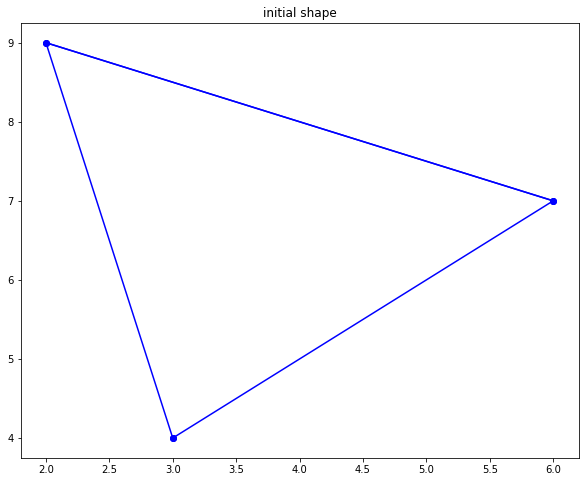

In [6]:
def drawTriangle(pnts, title=None):
    pnts = pnts.copy()
    pnts = np.vstack ( (pnts, pnts[0]) )
    #print (pnts)
    plt.plot (pnts[:-1, 0], pnts[:-1,1], pnts[1:, 0], pnts[1:,1], marker='o', color='blue')
    if title is not None:
        plt.title(title)
    plt.show()
#

drawTriangle(p, 'initial shape')

### Homography Transformation and quadrangle/quadrilateral mapping

## PyTorch Implementation for Image Mapping

In [7]:
import torch
import torchvision
import imageio
import matplotlib.pyplot as plt

batch_size = 1
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print ('device: ', device)

device:  cuda


Load a sample image for testing.

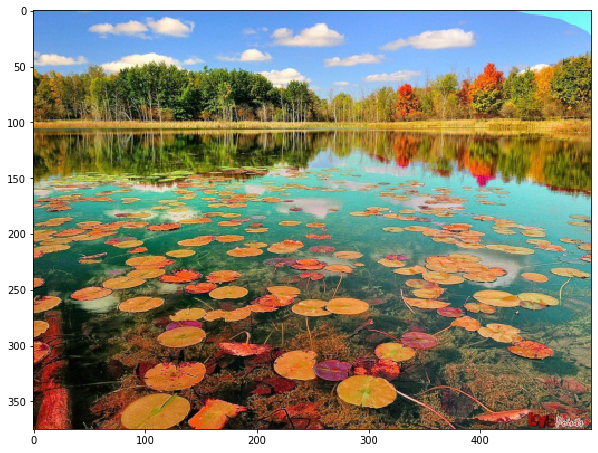

In [8]:
im = imageio.imread ('images/nature-500x375.jpg')
plt.imshow(im)
plt.show()

---
Now, define the coordinate transfrmation matrix in tensor format. Here the matrix coefficients are manually devised to have scaling in x and y directions respectively and perspective division effect (`transform_tensor[0,2,0]`).
- The image will be transformed by the transformations defined in the tensor.

In [9]:
# homography:
# With torch.repeat(), you can specify the number of repeats for each dimension:
transform_tensor = torch.eye(3).repeat(batch_size, 1,1).to(device)
transform_tensor[0,0,0] = 1.2
transform_tensor[0,1,1] = 1.4
transform_tensor[0,2,0] = -0.1
transform_tensor, transform_tensor.shape

(tensor([[[ 1.2000,  0.0000,  0.0000],
          [ 0.0000,  1.4000,  0.0000],
          [-0.1000,  0.0000,  1.0000]]], device='cuda:0'),
 torch.Size([1, 3, 3]))

---

Convert the image to pytorch tensor datatype of float32 and scale to [0,1]. If you change `batch_size`, the image tensor `im_batch_tensor` will have copies of the same images, which is simply for testing.

In [10]:
imtt = torch.tensor(im).permute(2,0,1).to(device)
im_batch_tensor = torch.stack( [imtt for _ in range(batch_size)] ).type(torch.float32) / 255. 
im_batch_tensor.shape, im_batch_tensor.dtype

(torch.Size([1, 3, 375, 500]), torch.float32)

Generate target meshgrid; here, 
- a backward transformation will be applied.
- below is a version of `torch.nn.functional.affine_grid()` but for perspective transformation (2D homography); in the case of 2D affine you can use `torch.nn.functional.affine_grid()`

In [11]:
N,C,H,W = im_batch_tensor.shape
grow, gcol = torch.meshgrid( [torch.linspace(-1,1,H), torch.linspace(-1,1,W)] )
print ('mesh grid: ', grow.shape, gcol.shape)
x, y = gcol.flatten(), grow.flatten()

mesh grid:  torch.Size([375, 500]) torch.Size([375, 500])


In [12]:
gcol # x-coordinates

tensor([[-1.0000, -0.9960, -0.9920,  ...,  0.9920,  0.9960,  1.0000],
        [-1.0000, -0.9960, -0.9920,  ...,  0.9920,  0.9960,  1.0000],
        [-1.0000, -0.9960, -0.9920,  ...,  0.9920,  0.9960,  1.0000],
        ...,
        [-1.0000, -0.9960, -0.9920,  ...,  0.9920,  0.9960,  1.0000],
        [-1.0000, -0.9960, -0.9920,  ...,  0.9920,  0.9960,  1.0000],
        [-1.0000, -0.9960, -0.9920,  ...,  0.9920,  0.9960,  1.0000]])

In [13]:
grow # y-coordinates

tensor([[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-0.9947, -0.9947, -0.9947,  ..., -0.9947, -0.9947, -0.9947],
        [-0.9893, -0.9893, -0.9893,  ..., -0.9893, -0.9893, -0.9893],
        ...,
        [ 0.9893,  0.9893,  0.9893,  ...,  0.9893,  0.9893,  0.9893],
        [ 0.9947,  0.9947,  0.9947,  ...,  0.9947,  0.9947,  0.9947],
        [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]])

In [14]:
x, y, x.shape, y.shape

(tensor([-1.0000, -0.9960, -0.9920,  ...,  0.9920,  0.9960,  1.0000]),
 tensor([-1., -1., -1.,  ...,  1.,  1.,  1.]),
 torch.Size([187500]),
 torch.Size([187500]))

Make the matrix of point coordinates with homogeneous coordinate representation, and add one more dimension for batch index using `unsqueeze(0)`.

In [15]:
xy_hom = torch.stack([x, y, torch.ones(x.shape[0])], dim=0).unsqueeze(0).to(device) # unsqueeze(0) for batch-dimension
xy_hom, xy_hom.shape

(tensor([[[-1.0000, -0.9960, -0.9920,  ...,  0.9920,  0.9960,  1.0000],
          [-1.0000, -1.0000, -1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]]],
        device='cuda:0'), torch.Size([1, 3, 187500]))

Now apply the transformation to the coordinates in `xy_hom`.

In [16]:
xy_transformed = transform_tensor.matmul (xy_hom)
xy_transformed, xy_transformed.shape

(tensor([[[-1.2000, -1.1952, -1.1904,  ...,  1.1904,  1.1952,  1.2000],
          [-1.4000, -1.4000, -1.4000,  ...,  1.4000,  1.4000,  1.4000],
          [ 1.1000,  1.0996,  1.0992,  ...,  0.9008,  0.9004,  0.9000]]],
        device='cuda:0'), torch.Size([1, 3, 187500]))

Perform perspective division to get 2D transformed grid coordinates.

In [17]:
# perspective division
grid = xy_transformed[:,:2,:] / (xy_transformed[:,2:3,:] + 1E-9)
grid.shape

torch.Size([1, 2, 187500])

Then change the tensor shape so that the grid tensor is in the form of (N,H,W,2); the 2 at the last indicate the two $xy$ coordinates of the grid locations.

In [18]:
# (N, H, W, 2); cf torch.nn.functional.grid_sample()
grid = grid.permute(0,2,1).reshape(-1,H,W,2)
grid.shape

torch.Size([1, 375, 500, 2])

---
Combine all the codes to define a function to generate the grid.

In [28]:
def homography_grid(theta, size, backward=True):
    """
    theta: Nx3x3 transformations, backward transformation!
    size: size of the image
    
    The target image grid of size is represented by meshgrid( [-1,1], [-1,1])
    """
    
    if backward == False:
        for i in range(theta.shape[0]):
            #print (theta[i])
            theta[i] = torch.inverse(theta[i])
    
    N,C,H,W = size
    grow, gcol = torch.meshgrid( [torch.linspace(-1,1,H).to(device), torch.linspace(-1,1,W).to(device)] )
    #print ('mesh grid: ', grow.shape, gcol.shape)
    x, y = gcol.flatten(), grow.flatten()
    x, y, x.shape, y.shape

    #Make the matrix of point coordinates with homogeneous coordinate representation, and add one more dimension for batch index using `unsqueeze(0)`.
    xy_hom = torch.stack([x, y, torch.ones(x.shape[0]).to(device)], dim=0).unsqueeze(0).to(device) # unsqueeze(0) for batch-dimension
    #xy_hom, xy_hom.shape

    # Now apply the transformation to the coordinates in `xy_hom`.
    xy_transformed = theta.matmul (xy_hom)
    #xy_transformed, xy_transformed.shape

    #Perform perspective division to get 2D transformed grid coordinates.
    grid = xy_transformed[:,:2,:] / (xy_transformed[:,2:3,:] + 1E-9)
    #grid.shape

    # Then change the tensor shape so that the grid tensor is in the form of (N,H,W,2); 
    # the 2 at the last indicate the two $xy$ coordinates of the grid locations.
    # (N, H, W, 2); cf torch.nn.functional.grid_sample()
    grid = grid.permute(0,2,1).reshape(-1,H,W,2)
    #grid.shape
    return grid
#

In [29]:
grid = homography_grid (transform_tensor, im_batch_tensor.shape)
transform_tensor.shape, grid.shape, grid.dtype, grid[0,0,0,:]

(torch.Size([1, 3, 3]),
 torch.Size([1, 375, 500, 2]),
 torch.float32,
 tensor([-1.0909, -1.2727], device='cuda:0'))

---
Now it's time to perform actual image transformation with the transformation matrix by applying `grid_sample()` method in `pytorch`.

In [30]:
transformed_batch = torch.nn.functional.grid_sample (im_batch_tensor, grid, mode='bilinear', align_corners=True)

transformed_batch.shape, transformed_batch[0,:,100,100]

(torch.Size([1, 3, 375, 500]),
 tensor([0.2793, 0.3505, 0.1785], device='cuda:0'))

---
Retrieve the image buffer from GPU/CPU memory and display it.

(375, 500, 3)


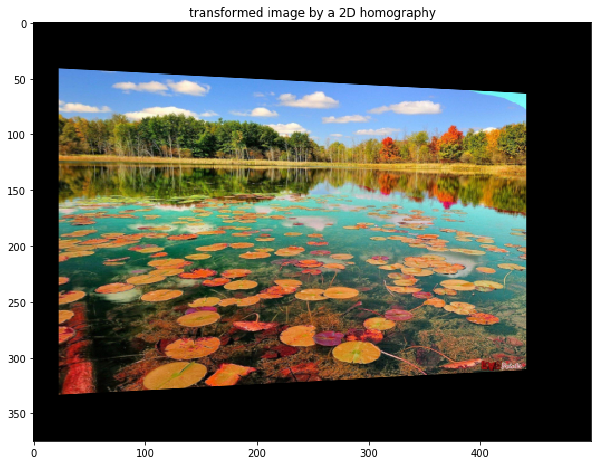

In [31]:
disp = transformed_batch[0].permute(1,2,0).to('cpu').numpy()
print(disp.shape)
plt.imshow (disp)
plt.title('transformed image by a 2D homography')
plt.show()

---
Rotation of the image along the y-axis

In [32]:
def Rot4(deg, axis='y'):
    rad = torch.tensor(np.deg2rad(deg))
    R = torch.eye(4).to(device)
    c, s = torch.cos(rad), torch.sin(rad)
    if axis == 'y':
        R[0,0] = R[2,2] = c
        R[0,2] = s
        R[2,0] = -s
    else:
        print('not implemented')
        R = None
    #
    return R
#

def Translate4(tx=0,ty=0,tz=0):
    T = torch.eye(4).to(device)
    T[0,-1] = tx
    T[1,-1] = ty
    T[2,-1] = tz
    return T

In [33]:
# Forward transformation

B, C, H, W = im_batch_tensor.shape

Kmat = torch.tensor( [ [W, 0, W/2], [0, H, H/2], [0,0,1] ])
iKmat = torch.inverse (Kmat)
iKmat * Kmat, iKmat.shape

K4 = torch.eye(4).to(device)
K4[:3, :3] = Kmat
iK4 = torch.eye(4).to(device)
iK4[:3,:3] = iKmat
print('Kmat = ', Kmat)

# rotation by degree 
R = Rot4(30).to(device)

# translation back/forth 
T0 = Translate4(0,0,-1).to(device)
T0inv = Translate4(0,0,1.2).to(device)

# -- P34, embedding from 3d homogeneous to 4d homogeneous vector
P34 = torch.zeros( (4,3) ).to(device)
P34[0,0] = P34[1,1]=P34[2,2]=P34[3,2] = 1.
# -- P43, projection from 4d homogeneous to 3d homogeneous. No perspective in 4D homography; so it has a simple form.
P43 = P34.clone().T
P43[2,3] = 0

# Scaling for grid generation

S = torch.tensor( [[W/2, 0, W/2], [0, H/2, H/2], [0,0,1]] ).to(device)
Sinv = torch.inverse(S)

#
HH = Sinv @ P43 @ K4 @ T0inv @ R @ T0 @ iK4 @ P34 @ S
HH = HH / HH[-1,-1]
print(HH / HH[-1,-1])

Kmat =  tensor([[500.0000,   0.0000, 250.0000],
        [  0.0000, 375.0000, 187.5000],
        [  0.0000,   0.0000,   1.0000]])
tensor([[ 7.2169e-01,  0.0000e+00,  4.9671e-08],
        [ 0.0000e+00,  8.3333e-01,  0.0000e+00],
        [-2.0833e-01,  0.0000e+00,  1.0000e+00]], device='cuda:0')


In [36]:
# include batch_size 
# backward transformation is the inverse

rotation_tensor = torch.inverse(HH.repeat(batch_size, 1,1).to(device))
rotation_tensor, rotation_tensor.shape

(tensor([[[ 1.3856e+00,  0.0000e+00, -6.8826e-08],
          [ 0.0000e+00,  1.2000e+00,  0.0000e+00],
          [ 2.8868e-01,  0.0000e+00,  1.0000e+00]]], device='cuda:0'),
 torch.Size([1, 3, 3]))

(375, 500, 3)


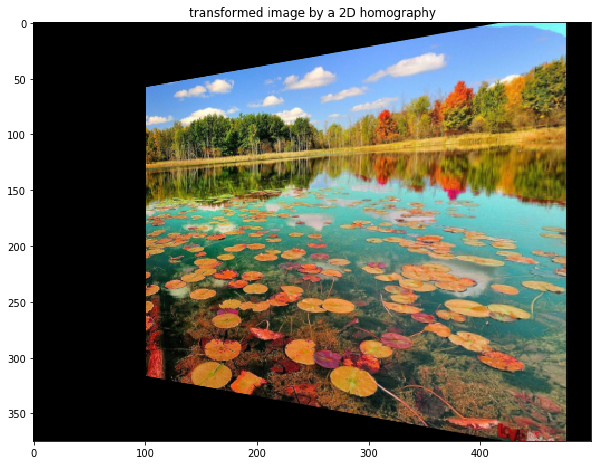

In [37]:
grid = homography_grid (rotation_tensor, im_batch_tensor.shape)
#grid.shape, grid.dtype, grid[0,0,0,:]

rotated_batch = torch.nn.functional.grid_sample (im_batch_tensor, grid, mode='bilinear', align_corners=True)
#transformed_batch.shape, transformed_batch[0,:,100,100]

disp = rotated_batch[0].permute(1,2,0).to('cpu').numpy()
print(disp.shape)
plt.imshow (disp)
plt.title('transformed image by a 2D homography')
plt.show()

(375, 500, 3)


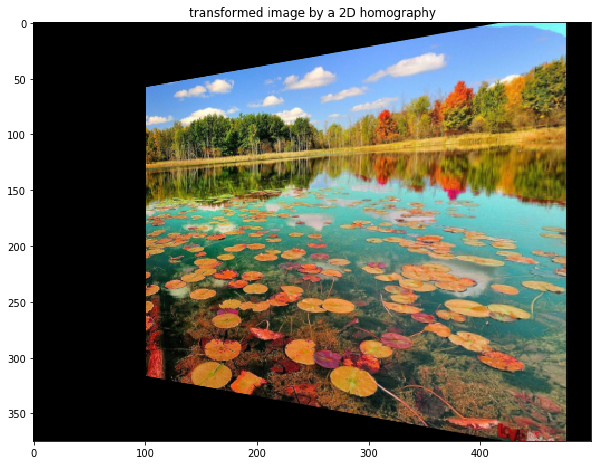

In [39]:
H_forward = HH.repeat(batch_size,1,1) # batch x 3 x 3
grid = homography_grid (H_forward, im_batch_tensor.shape, backward=False)
#grid.shape, grid.dtype, grid[0,0,0,:]

rotated_batch = torch.nn.functional.grid_sample (im_batch_tensor, grid, mode='bilinear', align_corners=True)
#transformed_batch.shape, transformed_batch[0,:,100,100]

disp = rotated_batch[0].permute(1,2,0).to('cpu').numpy()
print(disp.shape)
plt.imshow (disp)
plt.title('transformed image by a 2D homography')
plt.show()

---
**Q.1.** Change the values of elements in the transformation tensor and examine the effect of the transfrmation by visually inspecting the shape of the image.

**Q.2.** Change the parameter `mode` from `bilinear` to another in `grid_sample()` and display the image. Do you see any difference?

**Q.3.** Try `visdom` package for visualization.
https://www.youtube.com/watch?v=IVyaVTDgND4

---
End.